<a href="https://colab.research.google.com/github/vionalisa/TUBES-SKO/blob/main/TUBES_SKO_Bandwith.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Pt = 10*np.log(0.0001) #Daya output (dB)
p = 20 #Range panjang kabel optik 20 km
R = 0.82 #Responsifity
q = 1.6*(10**-19) #muatan elektron dalam Coulomb
Idark = 2*(10**-9) #Dark current
B = np.arange(0.5*(10**9),20*(10**9),1000) #Bandwidth 0.5-20 GHz
Teff = 290 #Suhu efektif dalam Kelvin
K = 1.38*(10**-23) #konstanta Stefann-Boltzmann
Rload = 50 #Resistansi ekivalen
e = 2.71828 #Bilangan euler
pi = 3.14

In [ ]:
#Daya sinyal yang diterima upstream (Pru) dalam Watt
Pru = 10**((Pt-(p*0.4)-(5*0.1)-(2*0.75)-4)/10)
print(Pru)
#Daya sinyal yang diterima downstream (Prd) dalam Watt
Prd = 10**((Pt-(p*0.3)-(5*0.1)-(2*0.75)-4)/10)
print(Prd)

3.087874407313469e-11
4.893951127326005e-11


In [ ]:
#Signal Power upstream (SPu) dalam A
SPu = 2*((Pru*R)**2)
print(SPu)
#Signal Power downstream (SPd) dalam A
SPd = 2*((Prd*R)**2)
print(SPd)

1.3778029273468476e-21
3.4608844784967156e-21


In [ ]:
#Total Noise Power upstream (NSu) dalam A
NSu = (2*q*Idark*B)+(2*q*(2*Pru*R)*B)+((4*K*Teff*B)/Rload)
print(NSu)
#Total Noise Power downstream (NSd) dalam A
NSd = (2*q*Idark*B)+(2*q*(2*Prd*R)*B)+((4*K*Teff*B)/Rload)
print(NSd)

[1.60080328e-13 1.60080649e-13 1.60080969e-13 ... 6.40321218e-12
 6.40321250e-12 6.40321282e-12]
[1.60080333e-13 1.60080653e-13 1.60080974e-13 ... 6.40321237e-12
 6.40321269e-12 6.40321301e-12]


In [ ]:
#Signal to Noise Ratio upstream (SNRu) dalam dB
SNRu = 10*np.log(SPu/NSu)
print(SNRu)
#Signal to Noise Ratio downstream (SNRd) dalam dB
SNRd = 10*np.log(SPd/NSd)
print(SNRd)

[-185.70696151 -185.70698151 -185.70700151 ... -222.59575455 -222.59575505
 -222.59575555]
[-176.49662144 -176.49664144 -176.49666144 ... -213.38541448 -213.38541498
 -213.38541548]


In [ ]:
#Q upstream (Qu)
Qu = (10**(SNRu/20))/2
print(Qu)
#Q downstream (Qd)
Qd = (10**(SNRd/20))/2
print(Qd)

[2.59192201e-10 2.59191604e-10 2.59191007e-10 ... 3.70836332e-12
 3.70836311e-12 3.70836289e-12]
[7.48408881e-10 7.48407157e-10 7.48405434e-10 ... 1.07077761e-11
 1.07077754e-11 1.07077748e-11]


In [ ]:
#Bit error rate upstream (BERu)
BERu = (1/np.sqrt(2*pi))*((e**((Qu**2)/-2))/Qu)
print(BERu)
#Bit error rate downstream (BERd)
BERd = (1/np.sqrt(2*pi))*((e**((Qd**2)/-2))/Qd)
print(BERd)

[1.53956578e+09 1.53956932e+09 1.53957287e+09 ... 1.07606350e+11
 1.07606356e+11 1.07606363e+11]
[5.33189080e+08 5.33190307e+08 5.33191535e+08 ... 3.72666966e+10
 3.72666988e+10 3.72667009e+10]


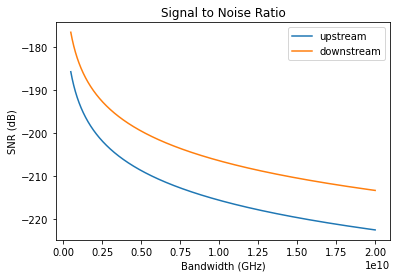

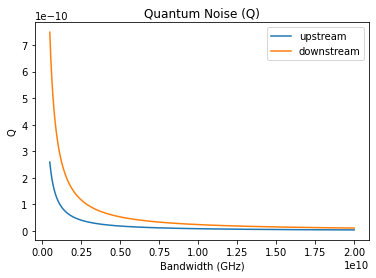

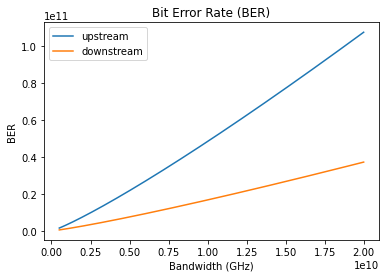

In [ ]:
#Grafik SNR
plt.plot(B, SNRu, label="upstream")
plt.plot(B, SNRd, label="downstream")
plt.title('Signal to Noise Ratio')
plt.xlabel('Bandwidth (GHz)')
plt.ylabel('SNR (dB)')
plt.legend()
plt.show()
#Grafik Q
plt.plot(B, Qu, label="upstream")
plt.plot(B, Qd, label="downstream")
plt.title('Quantum Noise (Q)')
plt.xlabel('Bandwidth (GHz)')
plt.ylabel('Q')
plt.legend()
plt.show()
#Grafik Bit error rate
plt.plot(B, BERu, label="upstream")
plt.plot(B, BERd, label="downstream")
plt.title('Bit Error Rate (BER)')
plt.xlabel('Bandwidth (GHz)')
plt.ylabel('BER')
plt.legend()
plt.show()

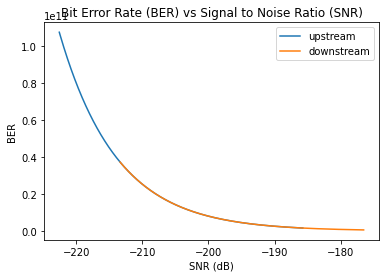

In [ ]:
#Grafik BER vs SNR
plt.plot(SNRu, BERu, label="upstream")
plt.plot(SNRd, BERd, label="downstream")
plt.title('Bit Error Rate (BER) vs Signal to Noise Ratio (SNR)')
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.legend()
plt.show()